In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/robot/Robot Classification.xlsx'
df = pd.read_excel(file_path)
df.head()

,Robot Type,Image 1,Image 2,Image 3,URL,Name,Brand,Scenario,Robot Subtype,Technology Category,Medical,Agricultural,Logistics and warehousing,Restaurant,Housework,Military,Locomotion
0,Industrial,NaN,NaN,NaN,https://www.youtube.com/watch?v=xLVm-QKEZSI Hu...,Figure 02,Figure AI,工廠,人型機器人,OpenAI,NaN,NaN,YES,NaN,NaN,NaN,雙足步行
1,Industrial,NaN,NaN,NaN,https://www.youtube.com/watch?v=F_7IPm7f1vI A...,Atlas,Boston Dynamics,物流、倉儲,人型機器人,AI視覺,NaN,NaN,YES,NaN,NaN,NaN,雙足步行
2,Industrial,NaN,NaN,NaN,https://www.youtube.com/watch?v=Zs5EMov15RA Fa...,Fanuc 機械手臂,Fanuc,工廠,機械臂機器人,移動規劃,NaN,NaN,NaN,NaN,NaN,NaN,固定式
3,Industrial,NaN,NaN,NaN,https://www.youtube.com/watch?v=Zs5EMov15RA Fa...,Fanuc AGV,Fanuc,工廠,倉儲型機器人,機器視覺,NaN,NaN,YES,NaN,NaN,NaN,輪式移動
4,Industrial,NaN,NaN,NaN,https://www.youtube.com/watch?v=Zs5EMov15RA Fa...,Pegasus,Amazon Robotics,物流、倉儲,倉儲型機器人,自主導航,NaN,NaN,YES,NaN,NaN,NaN,輪式移動


In [ ]:
!apt-get update -y
!apt-get install -y ffmpeg
!pip install yt-dlp
!pip install ipywidgets
!pip install -q plotly

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,927 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,520 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/

In [ ]:
# 4. 讀取影片時長（同時支援 YouTube 與 mp4）
import subprocess
import tempfile
import requests
from yt_dlp import YoutubeDL

def get_video_duration(url):
    try:
        # YouTube 影片處理方式
        if "youtube.com" in url or "youtu.be" in url:
            ydl_opts = {
                'quiet': True,
                'no_warnings': True,
                'skip_download': True,
                'forcejson': True,
            }
            with YoutubeDL(ydl_opts) as ydl:
                info = ydl.extract_info(url, download=False)
                return info.get("duration")

        # mp4/外部連結方式
        with tempfile.NamedTemporaryFile(suffix=".mp4") as tmp:
            response = requests.get(url, stream=True, timeout=30)
            for chunk in response.iter_content(chunk_size=1024 * 1024):
                tmp.write(chunk)
            tmp.flush()

            result = subprocess.run(
                ["ffprobe", "-v", "error", "-show_entries",
                 "format=duration", "-of",
                 "default=noprint_wrappers=1:nokey=1", tmp.name],
                stdout=subprocess.PIPE,
                stderr=subprocess.STDOUT)

            return float(result.stdout)
    except:
        return None

# 5. 套用函數並新增欄位
df['Duration (sec)'] = df['URL'].apply(get_video_duration)

# 6. 顯示結果（影片名稱 + 時長）
df[['Robot Type', 'URL', 'Duration (sec)']]


,Robot Type,URL,Duration (sec)
0,Industrial,https://www.youtube.com/watch?v=xLVm-QKEZSI Hu...,123
1,Industrial,https://www.youtube.com/watch?v=F_7IPm7f1vI A...,173
2,Industrial,https://www.youtube.com/watch?v=Zs5EMov15RA Fa...,491
3,Industrial,https://www.youtube.com/watch?v=Zs5EMov15RA Fa...,491
4,Industrial,https://www.youtube.com/watch?v=Zs5EMov15RA Fa...,491
5,Service,https://www.youtube.com/watch?v=Y_RO8fw25vg (I...,903
6,Service,https://www.youtube.com/watch?v=Y_RO8fw25vg (I...,903
7,Service,https://www.youtube.com/watch?v=Y_RO8fw25vg (I...,903
8,Service,https://www.youtube.com/watch?v=Z3yQHYNXPws&t=...,174
9,Industrial,https://www.youtube.com/watch?v=v8UaiRgqvlc (P...,371


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# 讀檔
FILE_PATH = '/content/drive/MyDrive/robot/Robot Classification.xlsx'  # 改成你的路徑
SHEET_NAME = 0
df = pd.read_excel(FILE_PATH, sheet_name=SHEET_NAME) if FILE_PATH.lower().endswith(('.xlsx','.xls')) else pd.read_csv(FILE_PATH)

# 1) 欄位清理：去前後空白
df.columns = df.columns.astype(str).str.strip()
# 2) 刪除重複欄位（只保留第一個）
if df.columns.duplicated().any():
    df = df.loc[:, ~df.columns.duplicated()]

# 只有兩個選擇 + 按鈕
col1 = widgets.Dropdown(options=list(df.columns), description='欄位1')
col2 = widgets.Dropdown(options=list(df.columns), description='欄位2')
run_btn = widgets.Button(description='交叉表', button_style='primary')
out = widgets.Output()

def series_1d(dfcol):
    """確保輸入是 1 維 Series；若因重複欄位變成 DataFrame，就只取第一欄。"""
    if isinstance(dfcol, pd.DataFrame):
        dfcol = dfcol.iloc[:, 0]
    return dfcol.astype(str).fillna('空值')

def on_run(_):
    with out:
        clear_output()
        c1, c2 = col1.value, col2.value
        s1 = series_1d(df[c1])
        s2 = series_1d(df[c2])
        ct = pd.crosstab(s1, s2, dropna=False)
        display(ct)

run_btn.on_click(on_run)
display(widgets.HBox([col1, col2, run_btn]), out)


Output()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# ===== 參數（你可以調整） =====
FILE = '/content/drive/MyDrive/robot/Robot Classification.xlsx'
TOP_N_PER_USE = 5     # 每個 scenario 僅保留最常見的前 N 個 Locomotion
MIN_FLOW = 2          # 連線最小數量門檻（低於就丟棄或併入 Other）
OTHER_LABEL = 'Other' # 併到「其他」的標籤名稱
# ===========================

df = pd.read_excel(FILE)[['Robot Type','Scenario','Locomotion']].dropna()
df.columns = ['robot','Scenario','locomotion']
for c in ['robot','Scenario','locomotion']:
    df[c] = df[c].astype(str).str.strip()

# 先算各 scenario 下的 locomotion 排名，保留前 N，其餘標成 Other
ul_counts = df.groupby(['Scenario','locomotion']).size().reset_index(name='cnt')
top_loco = (ul_counts.sort_values(['Scenario','cnt'], ascending=[True,False])
                    .groupby('Scenario').head(TOP_N_PER_USE))
top_keys = set(zip(top_loco['Scenario'], top_loco['locomotion']))

df['locomotion2'] = df.apply(
    lambda r: r['locomotion'] if (r['Scenario'], r['locomotion']) in top_keys else OTHER_LABEL,
    axis=1
)

# 兩段連線資料
ru = df.groupby(['robot','Scenario']).size().reset_index(name='value')
ul = df.groupby(['Scenario','locomotion2']).size().reset_index(name='value')

# 砍掉太小的流量
ru = ru[ru['value'] >= MIN_FLOW]
ul = ul[ul['value'] >= MIN_FLOW]

# 只保留仍然存在於 ru / ul 的節點
robots = sorted(ru['robot'].unique())
scenario   = sorted(set(ru['Scenario']).union(ul['Scenario'].unique()))
locos  = sorted(ul['locomotion2'].unique())

labels = robots + scenario + locos
idx = {name:i for i,name in enumerate(labels)}

# 組 link
sources, targets, values, colors = [], [], [], []
# 用 Use 上色
use_palette = {
    u: c for u,c in zip(scenario,
        ['#4C78A8','#F58518','#54A24B','#E45756','#72B7B2','#B279A2','#FF9DA6','#9D755D']*3)
}

# robot -> scenario
for r,u,v in ru.itertuples(index=False):
    sources.append(idx[r]); targets.append(idx[u]); values.append(int(v))
    colors.append(use_palette.get(u, 'rgba(150,150,150,0.35)'))

# scenario -> locomotion
for u,l,v in ul.itertuples(index=False):
    sources.append(idx[u]); targets.append(idx[l]); values.append(int(v))
    colors.append(use_palette.get(u, 'rgba(150,150,150,0.35)'))

# 固定三層座標（避免自動排列造成雜亂）
x, y = [], []
# 三欄平均分佈在 x = 0.1, 0.5, 0.9；y 依各層節點均分
def evenly_spaced(n):
    # 讓節點在 0~1 之間平均分布
    return [(i+0.5)/n for i in range(n)] if n>0 else []

y_robot = evenly_spaced(len(robots))
y_scenario   = evenly_spaced(len(scenario))
y_loco  = evenly_spaced(len(locos))

for r in robots: x.append(0.10); y.append(y_robot[robots.index(r)])
for u in scenario:   x.append(0.50); y.append(y_scenario[scenario.index(u)])
for l in locos:  x.append(0.90); y.append(y_loco[locos.index(l)])

# 建立 hover 資訊：顯示數量與簡單百分比
total = sum(values)
perc = [f"{v/total:.1%}" for v in values]

fig = go.Figure(go.Sankey(
    arrangement="fixed",
    node=dict(
        pad=18, thickness=18,
        label=labels,
        x=x, y=y,
        color=(['#7EA6E0']*len(robots) + ['#F8C99B']*len(scenario) + ['#93D7A3']*len(locos)),
        line=dict(color="rgba(0,0,0,0.3)", width=0.5)
    ),
    link=dict(
        source=sources, target=targets, value=values,
        color=[c.replace(')',',0.45)') if c.startswith('rgb') else c for c in colors],
        hovertemplate="<b>%{source.label}</b> → <b>%{target.label}</b><br>數量：%{value}<br>占比："+ "%{customdata}<extra></extra>",
        customdata=perc
    )
))

fig.update_layout(
    title="Robot Type → Scenario → Locomotion（桑基圖）",
    font=dict(size=12),
    height=620
)
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# 讀取檔案
file_path = '/content/drive/MyDrive/robot/Robot Classification.xlsx'
df = pd.read_excel(file_path)

# 欄位檢查
need_cols = ['Scenario', 'Robot Subtype', 'Technology Category']
for col in need_cols:
    if col not in df.columns:
        raise ValueError(f"缺少欄位：{col}")

# 清理缺值
df = df[need_cols].dropna()
df = df.astype(str).apply(lambda x: x.str.strip())  # 去掉多餘空白

# 統計數量
agg = df.value_counts(need_cols).reset_index(name='Count')

# 畫巢狀圓餅圖（Sunburst）
fig = px.sunburst(
    agg,
    path=['Scenario', 'Robot Subtype', 'Technology Category'],  # 層級順序
    values='Count',
    color='Scenario',  # 依用途上色
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data={'Count': True}
)
fig.update_layout(
    title='Scenario → Robot Subtype → Technology Category 巢狀圓餅圖',
    height=700
)
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# 讀檔：改成你的檔案路徑
FILE = '/content/drive/MyDrive/robot/Robot Classification.xlsx'
df = pd.read_excel(FILE)

# 必要欄位
need = ['Technology Category', 'Scenario', 'Robot Type']
for c in need:
    if c not in df.columns:
        raise ValueError(f'缺少欄位：{c}')

# 清理資料
dat = (df[need]
       .dropna()
       .astype(str).apply(lambda s: s.str.strip()))

# 聚合：每個 (Tech, Use, Type) 的數量
agg = (dat.groupby(['Technology Category','Scenario','Robot Type'])
          .size().reset_index(name='Count'))

# 畫 2D 氣泡圖
fig = px.scatter(
    agg,
    x='Technology Category',
    y='Scenario',
    size='Count',
    color='Robot Type',
    hover_name='Robot Type',
    hover_data={'Count': True, 'Technology Category': True, 'Scenario': True},
    size_max=40  # 最大泡泡尺寸
)

fig.update_layout(
    title='氣泡圖：Technology Category × Scenario × Robot Type',
    xaxis_title='Technology Category（技術類別）',
    yaxis_title='Scenario（用途）',
    legend_title_text='Robot Type',
    height=800
)

fig.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 3s (21.6 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


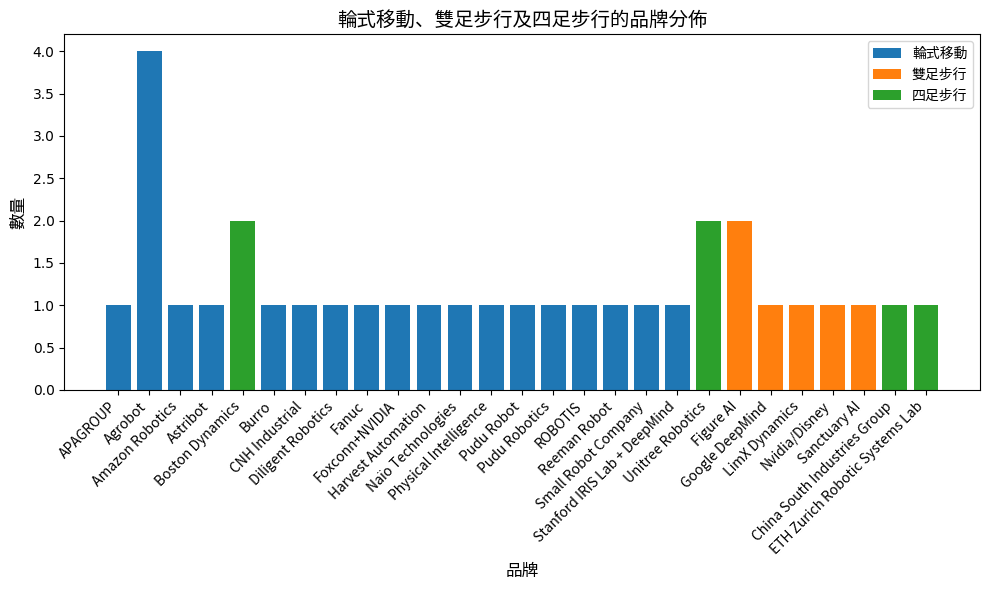

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取檔案
FILE = '/content/drive/MyDrive/robot/Robot Classification.xlsx'  # ← 換成你的檔案路徑
df = pd.read_excel(FILE)

# 設定中文字體（Colab）
!apt-get -y install fonts-noto-cjk
import matplotlib.font_manager as fm
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
my_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 篩選目標移動方式
target_locomotion = ['輪式移動', '雙足步行', '四足步行']
df_filtered = df[df['Locomotion'].isin(target_locomotion)]

# 統計 Brand 出現次數
brand_counts = df_filtered.groupby(['Locomotion', 'Brand']).size().reset_index(name='Count')

# 畫長條圖
plt.figure(figsize=(10, 6))
for locomotion in target_locomotion:
    subset = brand_counts[brand_counts['Locomotion'] == locomotion]
    plt.bar(subset['Brand'], subset['Count'], label=locomotion)

plt.xlabel('品牌', fontproperties=my_font, fontsize=12)
plt.ylabel('數量', fontproperties=my_font, fontsize=12)
plt.title('輪式移動、雙足步行及四足步行的品牌分佈', fontproperties=my_font, fontsize=14)
plt.xticks(rotation=45, ha='right', fontproperties=my_font)
plt.legend(prop=my_font)
plt.tight_layout()
plt.show()
